In [1]:
# Import libary and dependencies
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Read the data
file_path=('cleaned_data.csv')
data=pd.read_csv(file_path, index_col = 0)
data.head()

,Status,ZipCode,City,Price,Days_on_market,Beds,Baths,Sqft,Date,Acres,Lot_sqft,Liv_index
0,A,98001,Auburn,725000,4,3,0.00,3060,5/26/2021,0.227,9894,68
1,A,98001,Auburn,300000,4,2,1.00,920,5/26/2021,0.164,7150,68
2,S,98001,Auburn,555000,3,2,1.00,1196,5/7/2021,0.544,23689,68
3,A,98001,Auburn,1300000,220,4,1.75,2850,10/22/2020,6.000,261360,68
4,S,98001,Auburn,250000,46,2,1.50,1200,5/20/2021,0.220,9600,68


In [3]:
data = data.drop(columns=["Date","Status","ZipCode","City","Acres","Days_on_market"])
data.head()

,Price,Beds,Baths,Sqft,Lot_sqft,Liv_index
0,725000,3,0.00,3060,9894,68
1,300000,2,1.00,920,7150,68
2,555000,2,1.00,1196,23689,68
3,1300000,4,1.75,2850,261360,68
4,250000,2,1.50,1200,9600,68


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 0 to 4187
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      4128 non-null   int64  
 1   Beds       4128 non-null   int64  
 2   Baths      4128 non-null   float64
 3   Sqft       4128 non-null   int64  
 4   Lot_sqft   4128 non-null   int64  
 5   Liv_index  4128 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 225.8 KB


In [5]:
print(data['Price'].describe().apply(lambda x: '{:,.1f}'.format(x)))

count         4,128.0
mean      1,171,752.0
std       1,229,190.1
min         139,000.0
25%         659,990.0
50%         868,222.5
75%       1,299,237.5
max      27,500,000.0
Name: Price, dtype: object


C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\matplotlib\

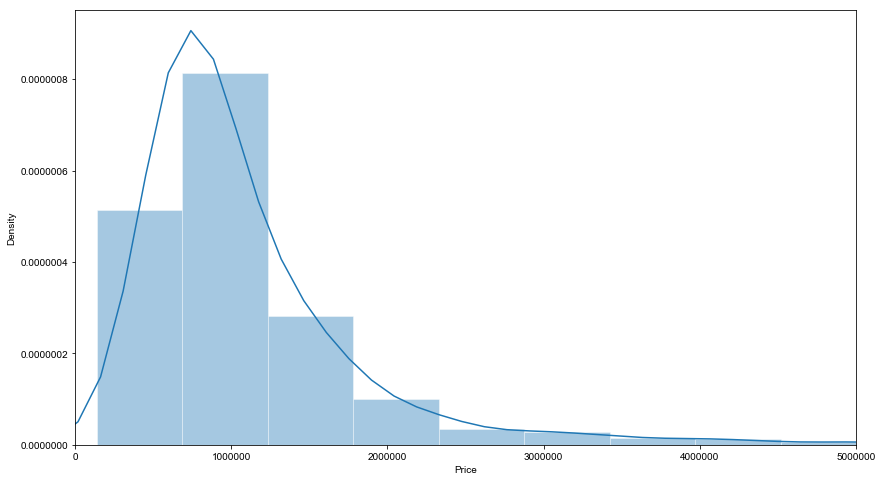

In [6]:
# Sale Price Distribution
fig, ax = plt.subplots(figsize=(14,8))
sns.set_style("whitegrid")
sns.distplot(data['Price'])
plt.xlim(0,5000000)
plt.show()

In [7]:
data['Price'].mean()

1171752.0479651163

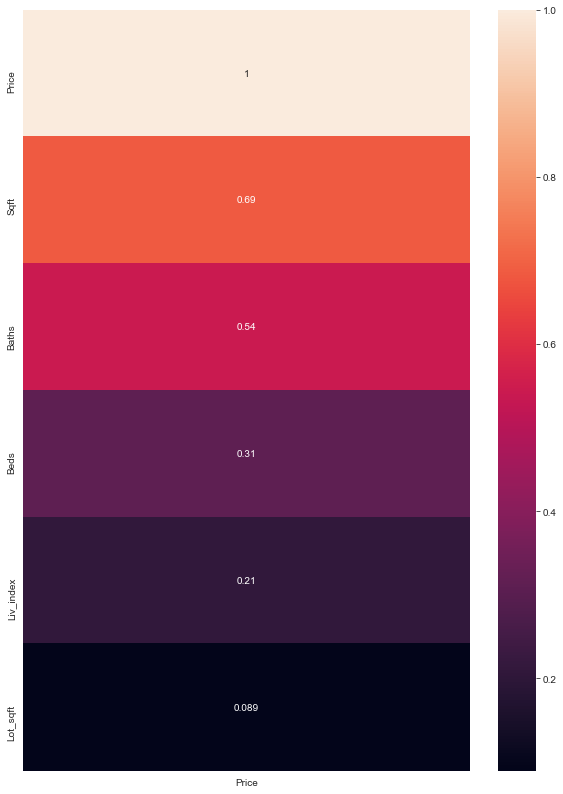

In [8]:
# Correlation to price value using heatmap
fig, ax = plt.subplots(figsize=(10,14))
price_corr = data.corr()[['Price']].sort_values(
  by='Price', ascending=False)
sns.heatmap(price_corr, annot=True, ax=ax) 

C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\U

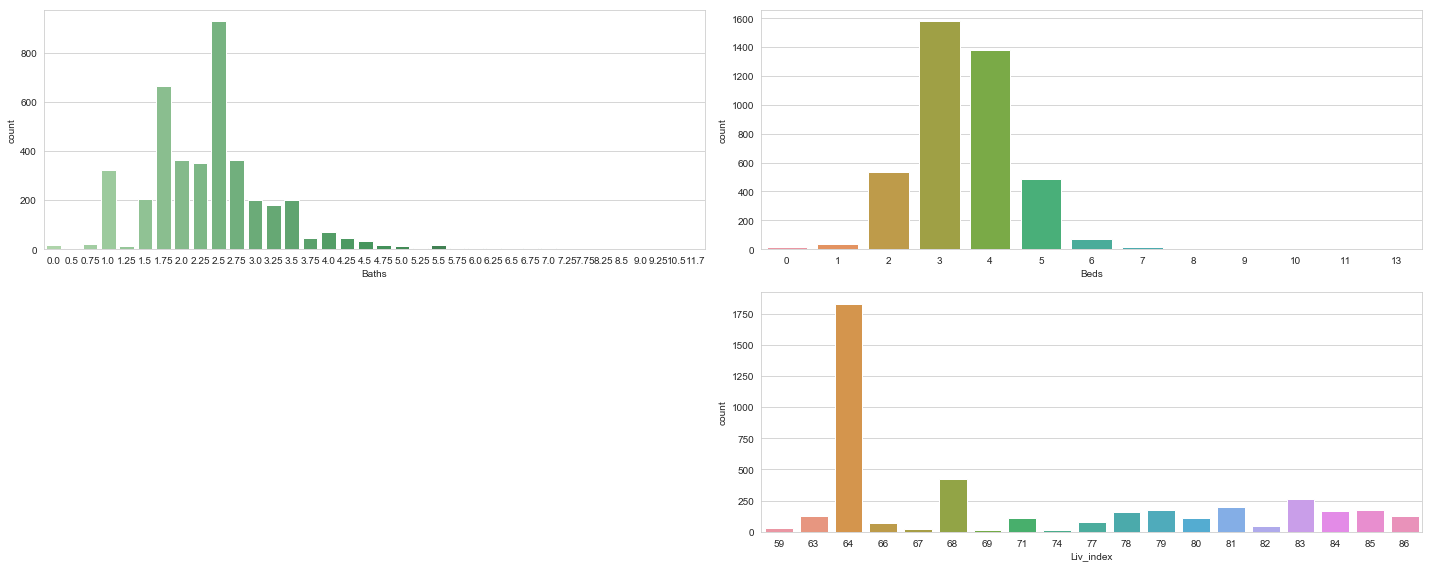

In [9]:
#visualizing bedrooms, bathrooms, floors,grades
fig = plt.figure(figsize=(20,8),constrained_layout=True)
fig.add_subplot(2,2,1)
sns.countplot(data['Baths'], palette = 'Greens_d')
fig.add_subplot(2,2,2)
sns.countplot(data['Beds'])
fig.add_subplot(2,2,4)
sns.countplot(data['Liv_index'])
plt.tight_layout()

C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


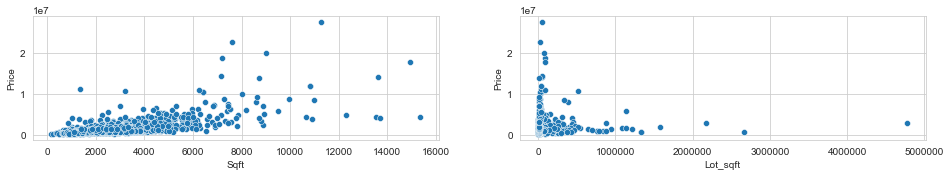

In [10]:
# sqft liveing and price scatter plot
fig = plt.figure(figsize=(16,5))
fig.add_subplot(2,2,1)
sns.scatterplot(data['Sqft'], data['Price'])
fig.add_subplot(2,2,2)
sns.scatterplot(data['Lot_sqft'],data['Price'])




## Machine Learning

In [37]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [38]:
# Define the features X set and the target y vector
X = data.drop('Price',axis =1).values
y = data['Price'].values
#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [39]:
#standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Method1 : Linear Regression

In [40]:
#Liner Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

#evaluate the model (intercept and slope)
regressor.intercept_
regressor.coef_

array([-306737.86442683,   77540.75343445,  987871.56658412,
         -3001.80755973,   41362.85416336])

In [41]:
regressor.intercept_

1185934.250994575

In [42]:
y_pred_lr = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})
df_lr = df.head(10)
df_lr

,Actual,Predicted
0,1250000,1.999642e+06
1,750000,1.108105e+06
2,2160000,2.286012e+06
3,920000,1.399684e+06
4,500000,1.084565e+06
5,1007000,7.549936e+05
6,525000,3.948510e+05
7,950000,1.692402e+06
8,1417675,1.355989e+06
9,675000,8.170328e+05


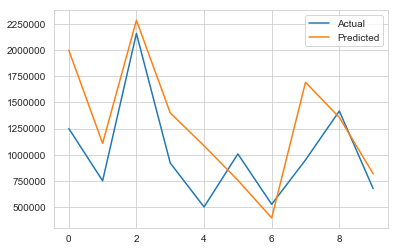

In [43]:
df_lr.plot()

In [44]:
from sklearn import metrics

print("Train Accuracy Score {:.2f} ".format(regressor.score(X_train,y_train)))
print("Test Accuracy Score {:.2f} ".format(regressor.score(X_test, y_test)))
print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred_lr))) 
print('Mean Squared Error:{:.2f}'.format(metrics.mean_squared_error(y_test, y_pred_lr)))  
print('Root Mean Squared Error:{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))))


Train Accuracy Score 0.50 
Test Accuracy Score 0.50 
Mean Absolute Error: 420131.53
Mean Squared Error:663699870255.79
Root Mean Squared Error:814677.77


## Method2: Neural Network

In [45]:
# Creating a Neural Network Model
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [77]:
# having 5 nueron is based on the number of available featurs
model = Sequential()

model.add(Dense(5,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [78]:
#Training model
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=100)

Epoch 1/100
22/22 [==============================] - 1s 11ms/step - loss: 3105798026462.6089 - val_loss: 2635021942784.0000
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 2792619120194.7827 - val_loss: 2635021418496.0000
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 3613615786785.3911 - val_loss: 2635021156352.0000
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 2736151108563.4780 - val_loss: 2635019845632.0000
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 3042005027617.3911 - val_loss: 2635019059200.0000
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 2914956584692.8696 - val_loss: 2635017748480.0000
Epoch 7/100
22/22 [==============================] - 0s 3ms/step - loss: 2940374522835.4780 - val_loss: 2635015913472.0000
Epoch 8/100
22/22 [==============================] - 0s 3ms/step - loss: 3094464316104.3477 - val_loss: 2635013292032.0000
Epoch 9/100
22/

In [79]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 6         
Total params: 126
Trainable params: 126
Non-trainable params: 0
_________________________________________________________________


In [80]:
y_pred_nn = model.predict(X_test)

In [81]:
y_pred_nn[0:5]

array([[746545.5 ],
       [213113.78],
       [370382.4 ],
       [177325.  ],
       [208982.12]], dtype=float32)

In [82]:
df_nn = pd.DataFrame({'Actual': y_test.ravel(), 'Predicted': y_pred_nn.ravel()})
df_nn = df_nn.head(10)
df_nn

,Actual,Predicted
0,1250000,746545.500000
1,750000,213113.781250
2,2160000,370382.406250
3,920000,177325.000000
4,500000,208982.125000
5,1007000,148893.000000
6,525000,374128.781250
7,950000,340674.406250
8,1417675,49868.792969
9,675000,296416.906250


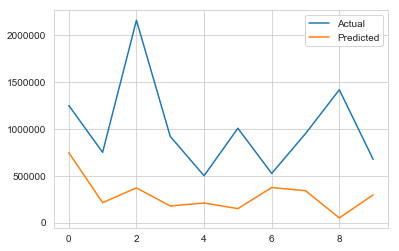

In [83]:
df_nn.plot()

In [84]:
y_pred_nn = model.predict(X_test)
from sklearn import metrics

#print("Train Accuracy Score {:.2f}".format(model.score(X_train,y_train)))
#print("Test Accuracy Score {:.2f}".format(model.score(X_test, y_test)))
print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred_nn)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred_nn)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_nn))))


Mean Absolute Error: 787357.22
Mean Squared Error: 1694130769178.51
Root Mean Squared Error: 1301587.79


## Method3: Random Forest Regressor

In [85]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=200, random_state=0)

rf_regressor.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=0)

In [86]:
y_pred_forest = rf_regressor.predict(X_test)
df_forest = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_forest})
df_forest = df_forest.head(10)
df_forest

,Actual,Predicted
0,1250000,1.868674e+06
1,750000,8.983675e+05
2,2160000,2.161650e+06
3,920000,1.139703e+06
4,500000,6.728267e+05
5,1007000,8.915122e+05
6,525000,6.315462e+05
7,950000,9.626326e+05
8,1417675,1.384997e+06
9,675000,7.710467e+05


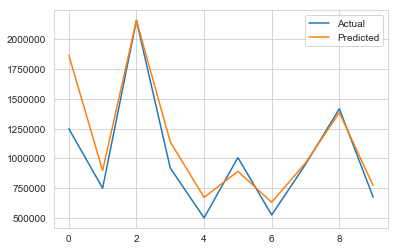

In [87]:
df_forest.plot()

In [88]:
y_pred_forest = rf_regressor.predict(X_test)
from sklearn import metrics

print("Train Accuracy Score {:.2f}".format(rf_regressor.score(X_train,y_train)))
print("Test Accuracy Score {:.2f}".format(rf_regressor.score(X_test, y_test)))
print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred_forest)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred_forest)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_forest))))


Train Accuracy Score 0.93
Test Accuracy Score 0.58
Mean Absolute Error: 328583.78
Mean Squared Error: 559220087806.43
Root Mean Squared Error: 747810.20


In [89]:
print('Model: Linear Regression\n')

print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred_lr)))
print('Mean Squared Error(MSE): {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred_lr)))
print('Root Mean Squared Error(RMSE): {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))))
print('*********************************\n')
print('Model: Neural Network\n')
print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred_nn))) 
print('Mean Squared Error(MSE):{:.2f}'.format(metrics.mean_squared_error(y_test, y_pred_nn)))  
print('Root Mean Squared Error(RMSE):{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_nn))))
print('*********************************\n')
print('Model: Random Forest\n')
print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred_forest))) 
print('Mean Squared Error(MSE):{:.2f}'.format(metrics.mean_squared_error(y_test, y_pred_forest)))  
print('Root Mean Squared Error(RMSE):{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_forest))))


Model: Linear Regression

Mean Absolute Error(MAE): 420131.53
Mean Squared Error(MSE): 663699870255.79
Root Mean Squared Error(RMSE): 814677.77
*********************************

Model: Neural Network

Mean Absolute Error(MAE): 787357.22
Mean Squared Error(MSE):1694130769178.51
Root Mean Squared Error(RMSE):1301587.79
*********************************

Model: Random Forest

Mean Absolute Error(MAE): 328583.78
Mean Squared Error(MSE):559220087806.43
Root Mean Squared Error(RMSE):747810.20


In [90]:
y_pred_lr[:5]

array([1999642.22449998, 1108105.08622086, 2286012.31620258,
       1399684.09045396, 1084565.42731632])

In [91]:
y_pred_nn[:5]

array([[746545.5 ],
       [213113.78],
       [370382.4 ],
       [177325.  ],
       [208982.12]], dtype=float32)

In [92]:
y_pred_forest[:5]

array([1868674.25 ,  898367.465, 2161649.95 , 1139703.26 ,  672826.745])